In [3]:
import time
import numpy as np
import pandas as pd
import os
#import cv2
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread, imshow

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [4]:

model_dir = "model.h5"

labels = ["Closed", "Open"]
IMG_SIZE = 48

model = tf.keras.models.load_model(model_dir)
model.summary()


Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 128)             

2021-12-09 13:29:48.220840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-09 13:29:48.220900: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-09 13:29:48.220946: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-ama2db): /proc/driver/nvidia/version does not exist
2021-12-09 13:29:48.221510: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:

def prepare(filepath):
    img_array = imread(filepath)
    # print(img_array.shape)
    resized_array = resize(img_array, (1, IMG_SIZE, IMG_SIZE, 1))
    resized_array = resized_array / 255
    # print(resized_array.shape)
    return resized_array


def predict(filepath):
    prediction = model.predict(prepare(filepath))
    return labels[((prediction > 0.2)*1)[0][0]]


2021-12-09 13:30:51.035576: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Prediction Open
Time 0.3751513957977295


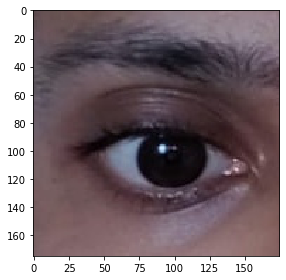

In [6]:

image_path = "images/1.png"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)



Prediction Closed
Time 0.07910919189453125


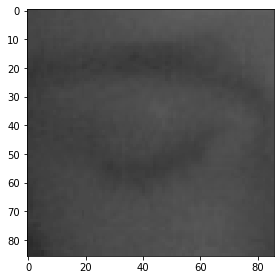

In [7]:
image_path = "images/0.png"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)

Prediction Open
Time 0.6415565013885498


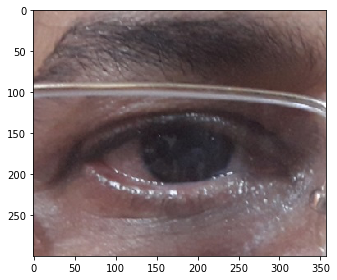

In [8]:
image_path = "images/2.png"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)

Prediction Closed
Time 0.3720054626464844


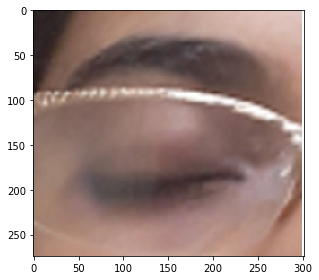

In [9]:
image_path = "images/3.jpg"
imshow(image_path)
# imshow(prepare(image_path))

start = time.time()
prediction = predict(image_path)
end = time.time()

print("Prediction", prediction)
print("Time", end-start)